# Import Libraries

In [95]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore, Back, Style 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd

from mlxtend.plotting import plot_confusion_matrix
# from plotly.offline import plot, iplot, init_notebook_mode
# import plotly.graph_objs as go
# from plotly.subplots import make_subplots
# import plotly.express as px
# from statsmodels.formula.api import ols
# import plotly.graph_objs as gobj

# init_notebook_mode(connected=True)
# warnings.filterwarnings("ignore")
# import plotly.figure_factory as ff


import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib inline

# import xgboost
# import lightgbm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'mlxtend'

# **Lets Explore the data**

In [26]:
df = pd.read_csv('dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1.0,0.0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1.0,0.0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1.0,1.0,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1.0,0.0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0.0,0.0,8,1


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,294.0,60.848075,11.995368,40.0,50.25,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.00,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.50,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.00,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.00,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.00,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.00,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.90,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.00,137.0,140.0,148.0
sex,295.0,0.644068,0.479608,0.0,0.00,1.0,1.0,1.0


platelets have mean 263358.029264, we need to normalize it.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       294 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       295 non-null    float64
 10  smoking                   295 non-null    float64
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(5), int64(8)
memory usage: 30.5 KB


## Correlation between Attribute and Heart Failure

<AxesSubplot:>

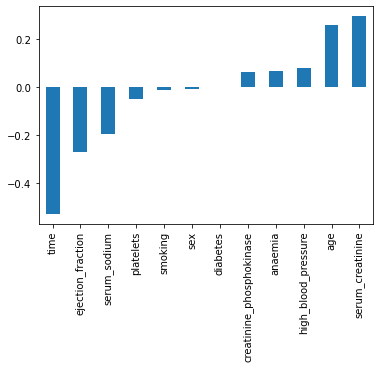

In [29]:
df.corr()['DEATH_EVENT'].drop('DEATH_EVENT').sort_values().plot(kind='bar')

### Time attribute 

In [30]:
df['time'].unique()

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

As time is the time at which patient died as we need to to predict the patient die or not so we don't know at what time in the future the patient will die/get censored!
so, Using the time column as a feature is wrong.

In [31]:
df=df.drop('time', axis=1)

In [32]:
df.corr()['DEATH_EVENT'].drop('DEATH_EVENT').sort_values()

ejection_fraction          -0.268603
serum_sodium               -0.195204
platelets                  -0.049139
smoking                    -0.014172
sex                        -0.008241
diabetes                   -0.001943
creatinine_phosphokinase    0.062728
anaemia                     0.066270
high_blood_pressure         0.079351
age                         0.256375
serum_creatinine            0.294278
Name: DEATH_EVENT, dtype: float64

ejection_fraction, Age and serum_creatinine have a very high corellation with Death. Let us explore them further

#### Visualizing dataset

<Figure size 864x288 with 0 Axes>

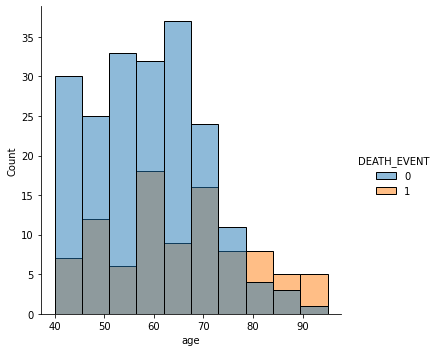

In [33]:
plt.figure(figsize=(12,4))
sns.displot(data=df, x='age',hue='DEATH_EVENT')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

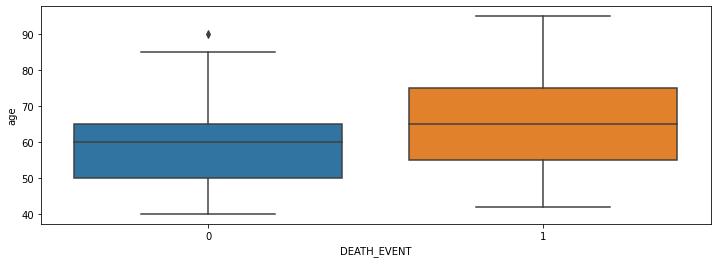

In [34]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='age')

In [35]:
df['serum_creatinine'].unique()

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='serum_creatinine'>

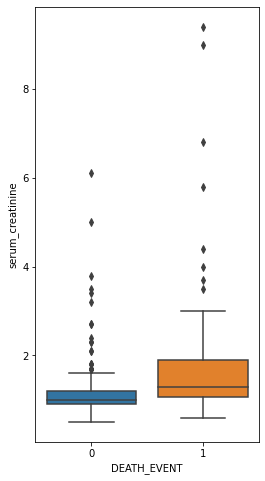

In [36]:
plt.figure(figsize=(4,8))
sns.boxplot(data=df, x='DEATH_EVENT', y='serum_creatinine')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='age'>

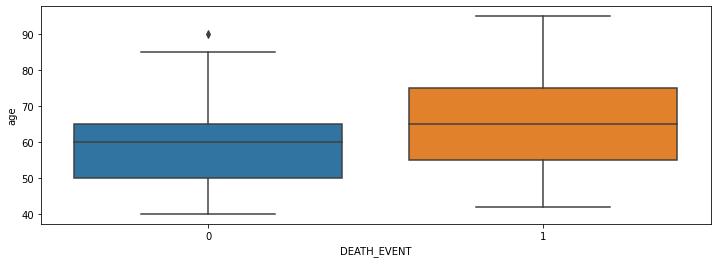

In [37]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='age')

we can see heart failure is directly corelated with age. Higher the age more chance of heart failure.

In [38]:
df['ejection_fraction'].unique()

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='ejection_fraction'>

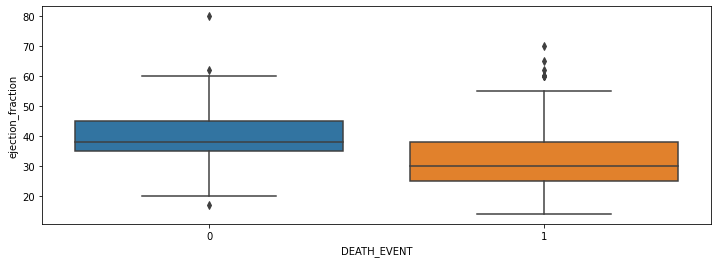

In [39]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='ejection_fraction')

we can see heart failure is indirectly corelated with age. Higher the ejection_fraction less chance of heart failure.

In [40]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='platelets'>

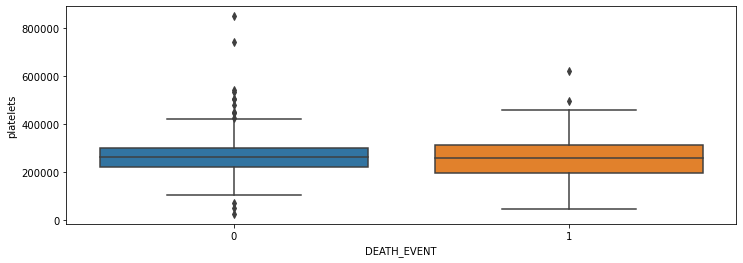

In [41]:
plt.figure(figsize=(12,4))
sns.boxplot(data=df, x='DEATH_EVENT', y='platelets')

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='creatinine_phosphokinase'>

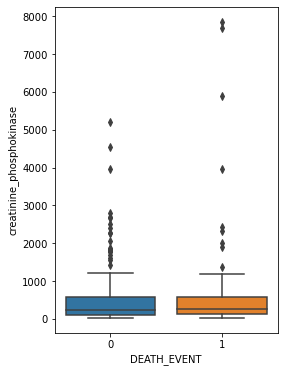

In [42]:
plt.figure(figsize=(4,6))
sns.boxplot(data=df, x='DEATH_EVENT', y='creatinine_phosphokinase')

Not much variation in above attribute

<AxesSubplot:>

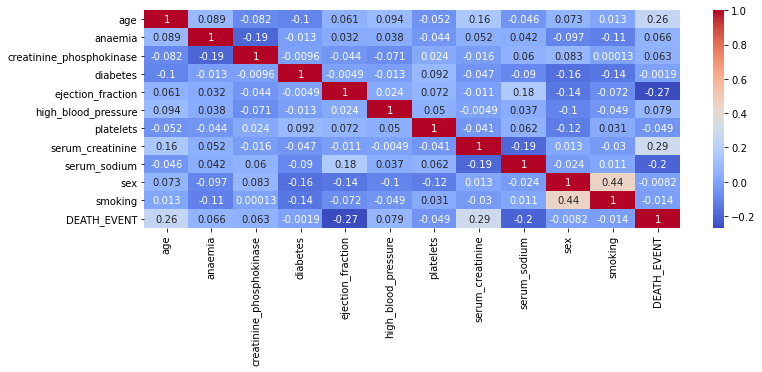

In [43]:
plt.figure(figsize=(12,4))
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

smoking sex platelets diabetes has very low correlation so we can remove it from feature column

<AxesSubplot:>

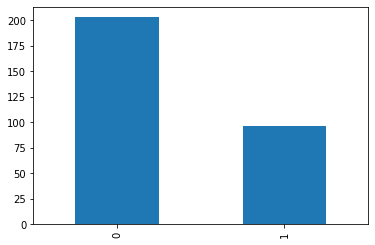

In [44]:
df["DEATH_EVENT"].value_counts().plot.bar()

In [45]:
df["DEATH_EVENT"].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

#### Data PreProcessing

In [46]:
df.isna().sum()

age                         5
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         4
smoking                     4
DEATH_EVENT                 0
dtype: int64

age has 5 Null value and sex and smoking has 4 Null value.\
we will replace Null value age value with mean and average and sex smoking with mode.

---
Mean = the average value (the sum of all values divided by number of values). \
Mode = the value that appears most frequently.


In [49]:
df["age"].fillna(df["age"].mean(), inplace = True)

In [52]:
df["sex"].fillna(df["sex"].mode()[0], inplace = True)
df["smoking"].fillna(df["smoking"].mode()[0], inplace = True)

In [53]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
DEATH_EVENT                 0
dtype: int64

There are no Null values, we are good to go.

# **Data Modeling**

**Train Test Split**

In [54]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1.0,0.0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1.0,0.0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1.0,1.0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1.0,0.0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1.0,1.0,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0.0,0.0,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0.0,0.0,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1.0,1.0,0


In [86]:
# neglecting alll features with low corelation
Features = ['age','anaemia','creatinine_phosphokinase','ejection_fraction','high_blood_pressure','serum_creatinine','serum_sodium'] 
x = df[Features]
y = df['DEATH_EVENT']
x

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium
0,75.0,0,582,20,1,1.9,130
1,55.0,0,7861,38,0,1.1,136
2,65.0,0,146,20,0,1.3,129
3,50.0,1,111,20,0,1.9,137
4,65.0,1,160,20,0,2.7,116
...,...,...,...,...,...,...,...
294,62.0,0,61,38,1,1.1,143
295,55.0,0,1820,38,0,1.2,139
296,45.0,0,2060,60,0,0.8,138
297,45.0,0,2413,38,0,1.4,140


there is high fluctuation in value so we need to normalize them.

In [87]:
column_to_normalize  = ['age','creatinine_phosphokinase','ejection_fraction','serum_creatinine','serum_sodium']  
x_to_normalize = x[column_to_normalize].values #returns a numpy array
min_max_scaler = preprocessing.Normalizer()
x_scaled = min_max_scaler.fit_transform(x_to_normalize)
x[column_to_normalize] = pd.DataFrame(x_scaled)
x

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium
0,0.124714,0,0.967781,0.033257,1,0.003159,0.216171
1,0.006995,0,0.999814,0.004833,0,0.000140,0.017297
2,0.314986,0,0.707508,0.096919,0,0.006300,0.625127
3,0.271189,1,0.602039,0.108475,0,0.010305,0.743057
4,0.310979,1,0.765486,0.095686,0,0.012918,0.554978
...,...,...,...,...,...,...,...
294,0.361228,0,0.355402,0.221398,1,0.006409,0.833154
295,0.030112,0,0.996428,0.020805,0,0.000657,0.076101
296,0.021781,0,0.997106,0.029042,0,0.000387,0.066796
297,0.018612,0,0.998025,0.015717,0,0.000579,0.057904


In [88]:
x.describe()

,age,anaemia,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.202221,0.431438,0.771680,0.126656,0.351171,0.004706,0.451260
std,0.125840,0.496107,0.227048,0.087551,0.478136,0.005097,0.263291
min,0.005842,0.000000,0.139427,0.003245,0.000000,0.000130,0.017297
25%,0.089051,0.000000,0.599434,0.054642,0.000000,0.001708,0.222426
50%,0.200761,0.000000,0.859926,0.108078,0.000000,0.003817,0.467518
75%,0.303501,1.000000,0.968451,0.187698,1.000000,0.005659,0.700130
max,0.525450,1.000000,0.999815,0.360728,1.000000,0.046691,0.869932


now range of all value is between 0 and 1.

In [89]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [90]:
accuracy_list = []

**Logistic Regression**

In [91]:
# logistic regression

log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)

In [92]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))

Accuracy of Logistic Regression is :  71.67%


In [93]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

NameError: name 'plot_confusion_matrix' is not defined

<Figure size 432x288 with 0 Axes>

**Support Vector**

In [37]:
# svc

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100* sv_clf_acc)

In [38]:
print(Fore.GREEN + "Accuracy of SVC is : ", "{:.2f}%".format(100* sv_clf_acc))

Accuracy of SVC is :  90.00%


<Figure size 432x288 with 0 Axes>

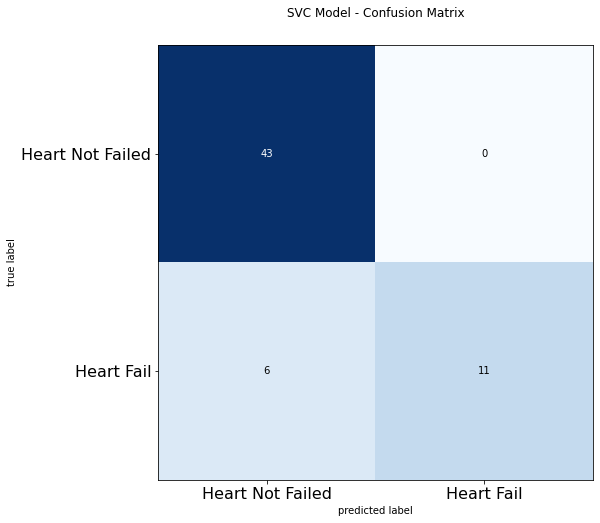

In [39]:
cm = confusion_matrix(y_test, sv_clf_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("SVC Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**K Neighbors Classifier**

In [40]:
# K Neighbors Classifier

kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)
kn_acc = accuracy_score(y_test, kn_pred)
accuracy_list.append(100*kn_acc)

In [41]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))

Accuracy of K Neighbors Classifier is :  91.67%


<Figure size 432x288 with 0 Axes>

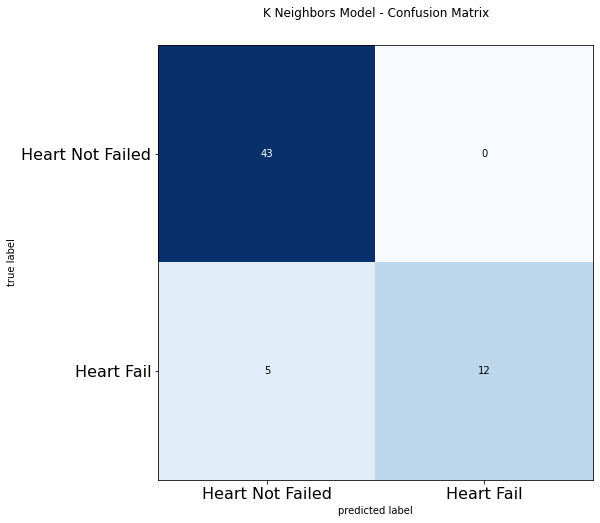

In [42]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Decision Tree Classifier**

In [43]:
# Decision Tree Classifier

dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
dt_acc = accuracy_score(y_test, dt_pred)
accuracy_list.append(100*dt_acc)

In [44]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))

Accuracy of Decision Tree Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

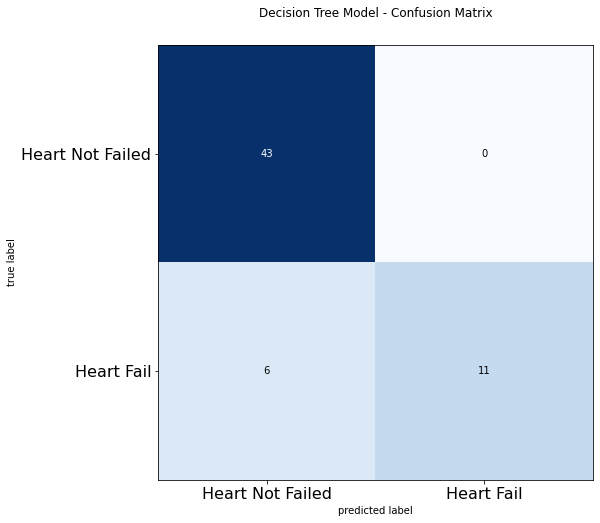

In [45]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Random Forest Classifier**

In [46]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)
r_acc = accuracy_score(y_test, r_pred)
accuracy_list.append(100*r_acc)

In [47]:
print(Fore.GREEN + "Accuracy of Random Forest Classifier is : ", "{:.2f}%".format(100* r_acc))

Accuracy of Random Forest Classifier is :  90.00%


<Figure size 432x288 with 0 Axes>

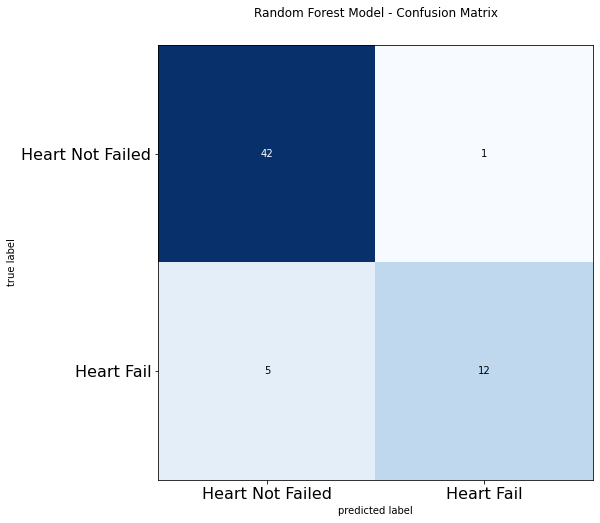

In [48]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Gradient Boosting Classifier**

In [49]:
# GradientBoostingClassifier

gradientboost_clf = GradientBoostingClassifier(max_depth=2, random_state=1)
gradientboost_clf.fit(x_train,y_train)
gradientboost_pred = gradientboost_clf.predict(x_test)
gradientboost_acc = accuracy_score(y_test, gradientboost_pred)
accuracy_list.append(100*gradientboost_acc)

In [50]:
print(Fore.GREEN + "Accuracy of Gradient Boosting is : ", "{:.2f}%".format(100* gradientboost_acc))

Accuracy of Gradient Boosting is :  93.33%


<Figure size 432x288 with 0 Axes>

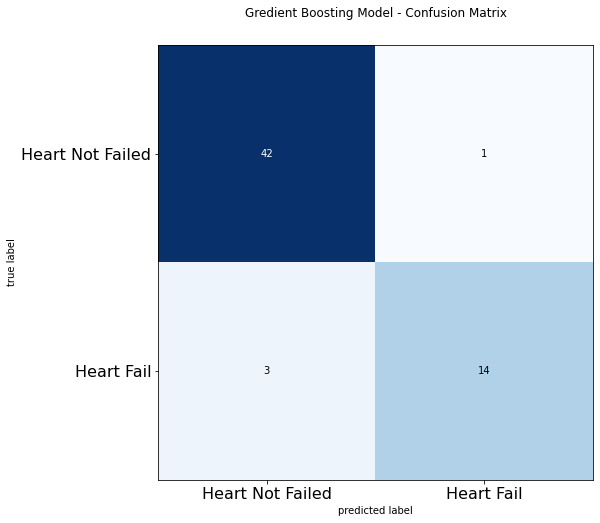

In [51]:
cm = confusion_matrix(y_test, gradientboost_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Gredient Boosting Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**xgbrf classifier**

In [52]:
# xgbrf classifier

xgb_clf = xgboost.XGBRFClassifier(max_depth=3, random_state=1)
xgb_clf.fit(x_train,y_train)
xgb_pred = xgb_clf.predict(x_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
accuracy_list.append(100*xgb_acc)

In [53]:
print(Fore.GREEN + "Accuracy of XGBRFClassifier is : ", "{:.2f}%".format(100* xgb_acc))

Accuracy of XGBRFClassifier is :  93.33%


<Figure size 432x288 with 0 Axes>

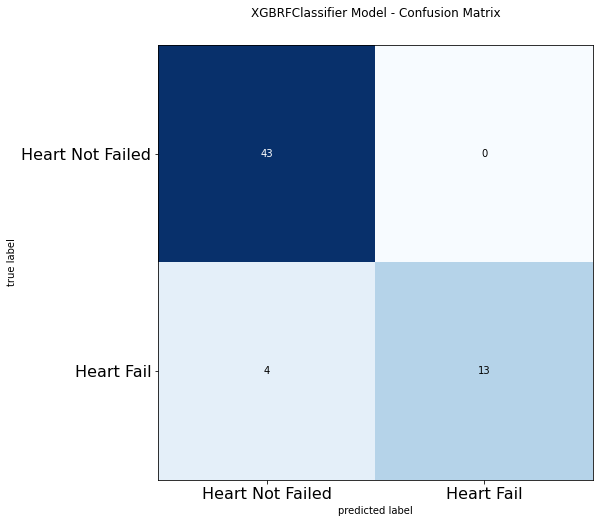

In [54]:
cm = confusion_matrix(y_test, xgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("XGBRFClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**LGBMClassifier**

In [55]:
#  lightgbm 

lgb_clf = lightgbm.LGBMClassifier(max_depth=2, random_state=4)
lgb_clf.fit(x_train,y_train)
lgb_pred = lgb_clf.predict(x_test)
lgb_acc = accuracy_score(y_test, lgb_pred)
accuracy_list.append(100*lgb_acc)

In [56]:
print(Fore.GREEN + "Accuracy of LGBMClassifier is : ","{:.2f}%".format(100* lgb_acc))

Accuracy of LGBMClassifier is :  91.67%


<Figure size 432x288 with 0 Axes>

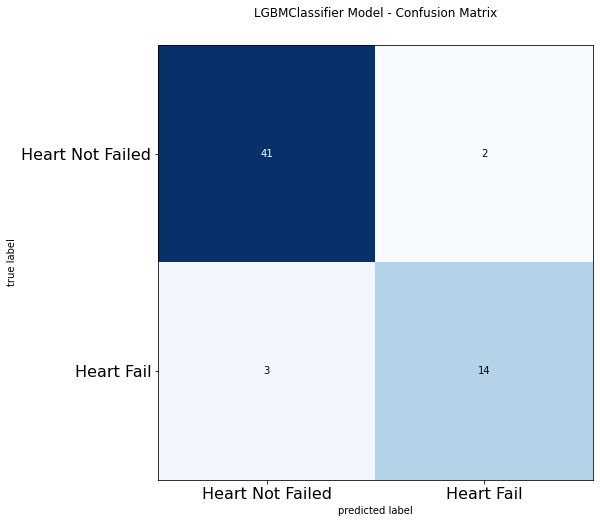

In [57]:
cm = confusion_matrix(y_test, lgb_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("LGBMClassifier Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [58]:
model_list = ['Logistic Regression', 'SVC','KNearestNeighbours', 'DecisionTree', 'RandomForest',
              'GradientBooster', 'XGBRF','LGBM']

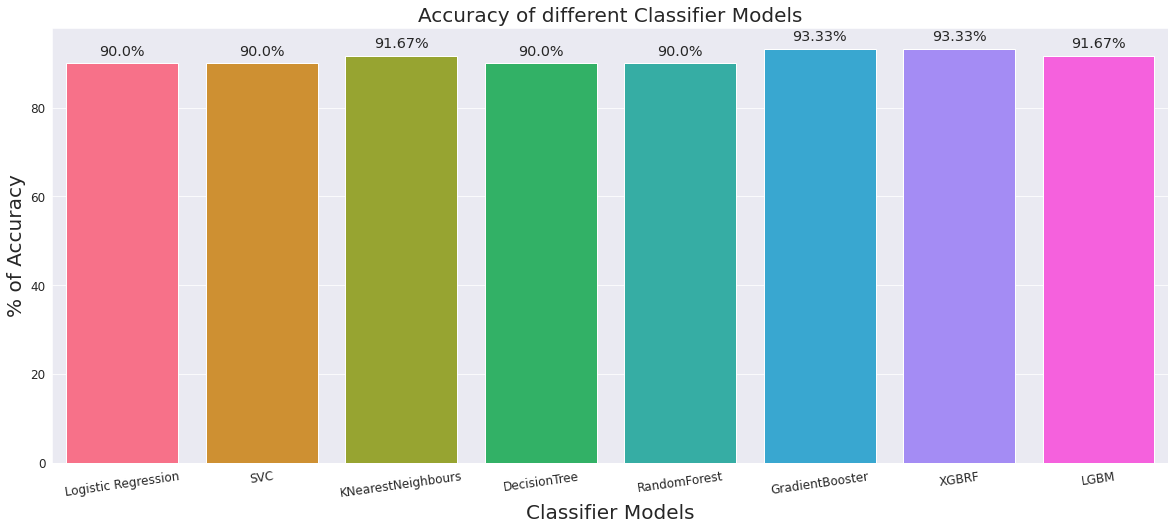

In [59]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

# Accuracy of different classifier models

* Gradient Booster Classifier: 93.33%
* XGBRFClassifier: 93.33%
* KNeighborsClassifier: 91.67%
* LGBMClassifier: 91.67%
* Random Forest Classifier: 90.00%
* DecisionTreeClassifier: 90.00%
* SVC: 90.00%
* Logistic Regression: 90.00%